In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
IMG_WIDTH, IMG_HEIGHT = 48, 48
BATCH_SIZE = 64
EPOCHS = 50

train_dir = r'D:/AIML/fer2013/train'
test_dir = r'D:/AIML/fer2013/test'


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_fer_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/50
359/359 [==============================] - 18s 43ms/step - loss: 2.2820 - accuracy: 0.2490 - val_loss: 1.9074 - val_accuracy: 0.2524
Epoch 2/50
359/359 [==============================] - 15s 41ms/step - loss: 1.7029 - accuracy: 0.3120 - val_loss: 1.5984 - val_accuracy: 0.3811
Epoch 3/50
359/359 [==============================] - 15s 42ms/step - loss: 1.6158 - accuracy: 0.3553 - val_loss: 1.5444 - val_accuracy: 0.3848
Epoch 4/50
359/359 [==============================] - 16s 45ms/step - loss: 1.5334 - accuracy: 0.3979 - val_loss: 1.4862 - val_accuracy: 0.4276
Epoch 5/50
359/359 [==============================] - 18s 49ms/step - loss: 1.4816 - accuracy: 0.4205 - val_loss: 1.4430 - val_accuracy: 0.4484
Epoch 6/50
359/359 [==============================] - 19s 54ms/step - loss: 1.4390 - accuracy: 0.4371 - val_loss: 1.4176 - val_accuracy: 0.4562
Epoch 7/50
359/359 [==============================] - 19s 54ms/step - loss: 1.3962 - accuracy: 0.4540 - val_loss: 1.3900 - val_accuracy:

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856 

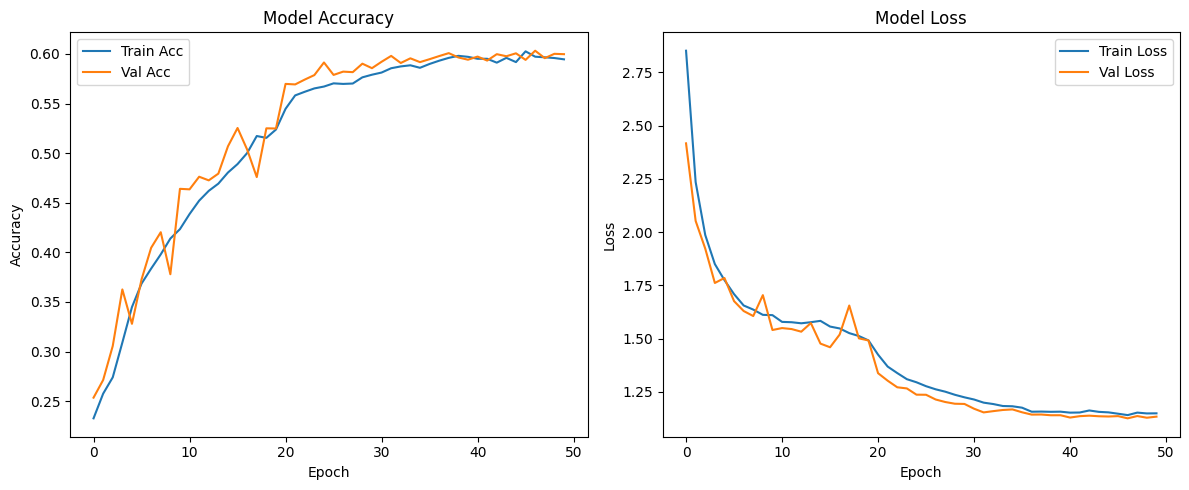

7178/7178 [==============================] - 26s 4ms/step


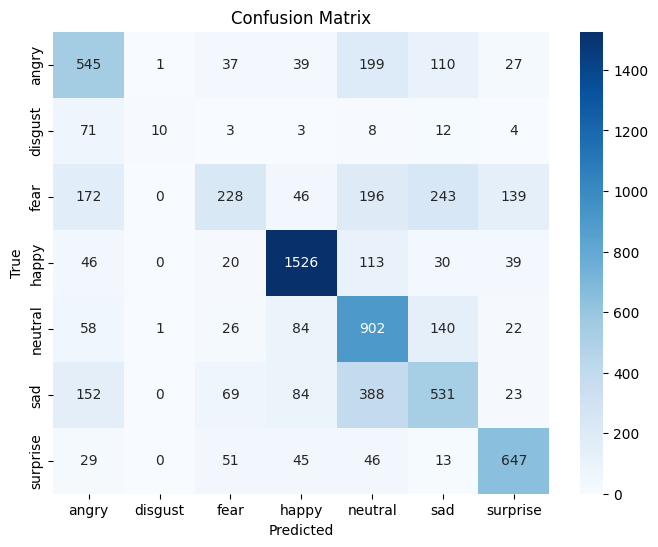

Classification Report:

              precision    recall  f1-score   support

       angry       0.51      0.57      0.54       958
     disgust       0.83      0.09      0.16       111
        fear       0.53      0.22      0.31      1024
       happy       0.84      0.86      0.85      1774
     neutral       0.49      0.73      0.58      1233
         sad       0.49      0.43      0.46      1247
    surprise       0.72      0.78      0.75       831

    accuracy                           0.61      7178
   macro avg       0.63      0.53      0.52      7178
weighted avg       0.61      0.61      0.59      7178



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report

# Image size and paths
IMG_WIDTH, IMG_HEIGHT = 48, 48
BATCH_SIZE = 64
EPOCHS = 50

train_dir = r'D:/AIML/fer2013/train'
test_dir = r'D:/AIML/fer2013/test'

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Custom CNN Model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 4 (optional for deeper model)
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_fer_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Flatten, Dense,
                                     BatchNormalization, LeakyReLU, GlobalAveragePooling2D)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report
import os

# -----------------------------
# CONFIGURATION
# -----------------------------
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 64
EPOCHS = 50
NUM_CLASSES = 7
DATASET_DIR = r'D:/AIML/fer2013/train'
test_dir = r'D:/AIML/fer2013/test'# One folder with 7 subfolders (one per class)

# -----------------------------
# FOCAL LOSS FUNCTION
# -----------------------------
class CategoricalFocalLoss(Loss):
    def __init__(self, gamma=2.0, alpha=0.25, **kwargs):
        super(CategoricalFocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        focal_loss = self.alpha * K.pow(1 - y_pred, self.gamma) * cross_entropy
        return K.sum(focal_loss, axis=1)

# -----------------------------
# DATA GENERATORS
# -----------------------------
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# -----------------------------
# MODEL
# -----------------------------
model = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalFocalLoss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# CALLBACKS
# -----------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_model_focal.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)
]

# -----------------------------
# TRAINING
# -----------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# -----------------------------
# EVALUATION
# -----------------------------
print("\nEvaluating on validation set (used as test)...")
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# Classification Report
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 64)        0         
                                   

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# -----------------------------
# CONFIG
# -----------------------------
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 64
EPOCHS = 50
NUM_CLASSES = 7
DATASET_DIR = r'D:/AIML/fer2013/train'

# -----------------------------
# DATA GENERATORS
# -----------------------------
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True
)

train_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# -----------------------------
# CLASS WEIGHTS
# -----------------------------
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# -----------------------------
# MODEL (Simplified First)
# -----------------------------
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# CALLBACKS
# -----------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_basic.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4)
]

# -----------------------------
# TRAIN
# -----------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weights
)

# -----------------------------
# EVALUATION
# -----------------------------
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.4f}")


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                     

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                     

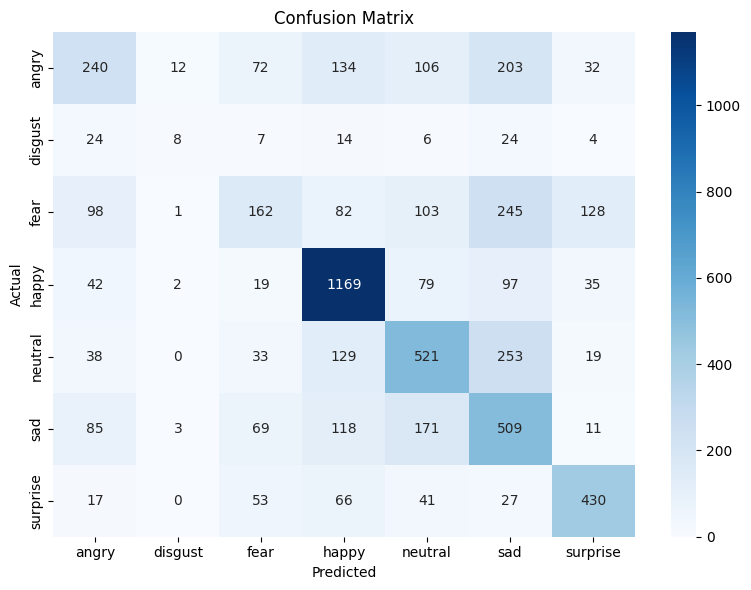

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Dense,
                                     BatchNormalization, LeakyReLU, GlobalAveragePooling2D)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# -----------------------------
# CONFIGURATION
# -----------------------------
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 64
EPOCHS = 50
NUM_CLASSES = 7
DATASET_DIR = r'D:/AIML/fer2013/train'
TEST_DIR = r'D:/AIML/fer2013/test'

# -----------------------------
# FOCAL LOSS FUNCTION
# -----------------------------
class CategoricalFocalLoss(Loss):
    def __init__(self, gamma=2.0, alpha=0.25, **kwargs):
        super(CategoricalFocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        focal_loss = self.alpha * K.pow(1 - y_pred, self.gamma) * cross_entropy
        return K.sum(focal_loss, axis=1)

# -----------------------------
# DATA GENERATORS
# -----------------------------
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# -----------------------------
# MODEL
# -----------------------------
model = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalFocalLoss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# CALLBACKS
# -----------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_model_focal.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)
]

# -----------------------------
# TRAINING
# -----------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# -----------------------------
# EVALUATION
# -----------------------------
print("\nEvaluating on validation set...")
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# -----------------------------
# CLASSIFICATION REPORT
# -----------------------------
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dropout,
                                     BatchNormalization, LeakyReLU, GlobalAveragePooling2D,
                                     Dense, Add, Multiply, GlobalMaxPooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report
import os

# -----------------------------
# CONFIGURATION
# -----------------------------
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 64
EPOCHS = 60
NUM_CLASSES = 7
DATASET_DIR = r'D:/AIML/fer2013/train'
TEST_DIR = r'D:/AIML/fer2013/test'

# -----------------------------
# FOCAL LOSS
# -----------------------------
class CategoricalFocalLoss(Loss):
    def __init__(self, gamma=2.0, alpha=0.5, **kwargs):
        super(CategoricalFocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        loss = self.alpha * K.pow(1 - y_pred, self.gamma) * cross_entropy
        return K.sum(loss, axis=1)

# -----------------------------
# SE Block (Squeeze & Excite)
# -----------------------------
def se_block(input_tensor, ratio=8):
    channel_axis = -1
    filters = input_tensor.shape[channel_axis]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = tf.expand_dims(tf.expand_dims(se, 1), 1)
    return Multiply()([input_tensor, se])

# -----------------------------
# Residual Block
# -----------------------------
def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(filters, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = se_block(x)  # Squeeze & Excite
    x = Add()([x, shortcut])
    x = LeakyReLU()(x)
    return x

# -----------------------------
# DATA GENERATORS
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# -----------------------------
# MODEL
# -----------------------------
def build_model(input_shape=(64,64,3), num_classes=7):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3,3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(128, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(256, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = residual_block(x, 256)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(512, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = residual_block(x, 512)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.4)(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

model = build_model()
model.compile(optimizer=Adam(0.001),
              loss=CategoricalFocalLoss(gamma=2.0, alpha=0.5),
              metrics=['accuracy'])

model.summary()

# -----------------------------
# CALLBACKS
# -----------------------------
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5, verbose=1),
    ModelCheckpoint('best_emotion_model.h5', save_best_only=True)
]

# -----------------------------
# TRAINING
# -----------------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

# -----------------------------
# EVALUATION
# -----------------------------
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

# -----------------------------
# CLASSIFICATION REPORT
# -----------------------------
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re

In [2]:
model.save('custom_model.keras') 

NameError: name 'mobile' is not defined

In [ ]:
# ✅ Enhanced FER-2013 CNN Training Pipeline
# Includes: CutMix, Focal Loss, Class Weights, Label Smoothing, ReduceLROnPlateau, Callbacks

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# --- CONFIG ---
BATCH_SIZE = 64
IMG_SIZE = (64, 64)
EPOCHS = 70
NUM_CLASSES = 7

# --- DATASET ---
train_dir = r'D:/AIML/fer2013/train'
val_dir = r'D:/AIML/fer2013/train'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

# --- CLASS WEIGHTS ---
y_labels = train_gen.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- FOCAL LOSS ---
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.math.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

# --- BUILD MODEL ---
def build_model():
    inputs = layers.Input(shape=(64, 64, 3))

    def conv_block(x, filters):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.LeakyReLU()(x)
        x = layers.MaxPooling2D()(x)
        x = layers.Dropout(0.25)(x)
        return x

    x = conv_block(inputs, 64)
    x = conv_block(x, 128)
    x = conv_block(x, 256)
    x = conv_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='swish')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

model = build_model()

# --- COMPILE ---
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)

# --- CALLBACKS ---
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.1, verbose=1),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
]

# --- TRAIN ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# --- EVALUATE ---
loss, acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")

# --- CLASSIFICATION REPORT ---
from sklearn.metrics import classification_report
import numpy as np

val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
labels = list(val_gen.class_indices.keys())
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Epoch 1/70
449/449 [==============================] - 2443s 5s/step - loss: 0.3307 - accuracy: 0.2303 - val_loss: 0.3372 - val_accuracy: 0.2508 - lr: 0.0010
Epoch 2/70
449/449 [==============================] - 251s 556ms/step - loss: 0.3098 - accuracy: 0.2605 - val_loss: 0.3567 - val_accuracy: 0.2671 - lr: 0.0010
Epoch 3/70
449/449 [==============================] - 87s 194ms/step - loss: 0.2942 - accuracy: 0.3048 - val_loss: 0.2731 - val_accuracy: 0.3437 - lr: 0.0010
Epoch 4/70
449/449 [==============================] - 80s 178ms/step - loss: 0.2826 - accuracy: 0.3317 - val_loss: 0.2629 - val_accuracy: 0.3818 - lr: 0.0010
Epoch 5/70
449/449 [==============================] - 96s 213ms/step - loss: 0.2717 - accuracy: 0.3600 - val_loss: 0.2484 - val_accuracy: 0.4045 - lr: 0.0010
Epoch 6/70
449/449 [==============================] - 83s 185ms/step - loss: 0.2636 - accuracy: 0.3849 - val_loss: 0.2745 - 

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/70
359/359 [==============================] - 132s 356ms/step - loss: 2.4341 - categorical_accuracy: 0.1844 - val_loss: 1.9762 - val_categorical_accuracy: 0.2270 - lr: 0.0010
Epoch 2/70
359/359 [==============================] - 42s 116ms/step - loss: 2.0401 - categorical_accuracy: 0.2143 - val_loss: 1.8645 - val_categorical_accuracy: 0.2487 - lr: 0.0010
Epoch 3/70
359/359 [==============================] - 44s 122ms/step - loss: 1.9228 - categorical_accuracy: 0.2483 - val_loss: 1.8212 - val_categorical_accuracy: 0.3022 - lr: 0.0010
Epoch 4/70
359/359 [==============================] - 47s 131ms/step - loss: 1.8335 - categorical_accuracy: 0.2916 - val_loss: 1.7694 - val_categorical_accuracy: 0.3268 - lr: 0.0010
Epoch 5/70
359/359 [==============================] - 45s 126ms/step - loss: 1.7482 - categorical_accuracy: 0.3355 - val_loss: 1.7708 - val_categorical_accuracy: 0.3299 - lr: 0.0010
Epoc

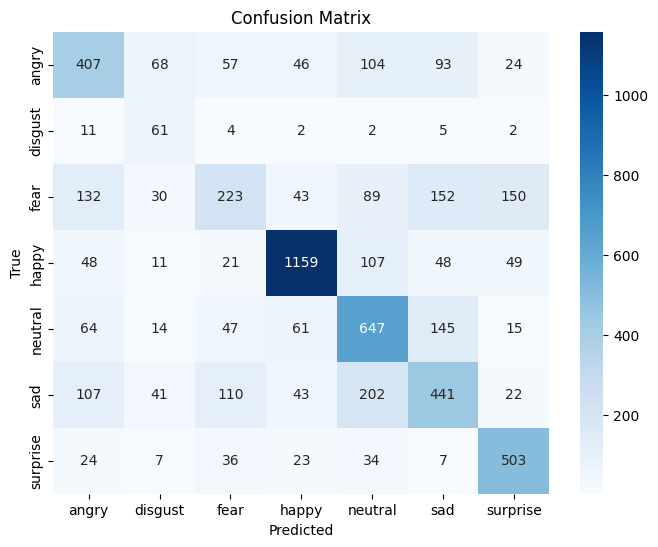

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- CONFIG ---
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 70
NUM_CLASSES = 7
TRAIN_DIR = r'D:/AIML/fer2013/train'

# --- Data Augmentation ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# --- Class Weights ---
y_train = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# --- Custom CNN Model ---
def build_custom_model(input_shape=(48, 48, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_custom_model()

# --- Compile ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

# --- Callbacks ---
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.1, verbose=1),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("custom_best_model.h5", save_best_only=True, monitor='val_categorical_accuracy', mode='max')
]

# --- Train ---
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# --- Evaluate ---
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

# --- Report & Confusion Matrix ---
val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_labels = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_labels, target_names=list(val_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/70
359/359 [==============================] - 46s 119ms/step - loss: 2.2196 - categorical_accuracy: 0.1786 - val_loss: 1.8984 - val_categorical_accuracy: 0.1925 - lr: 0.0010
Epoch 2/70
359/359 [==============================] - 47s 130ms/step - loss: 1.9414 - categorical_accuracy: 0.2294 - val_loss: 1.8497 - val_categorical_accuracy: 0.2423 - lr: 0.0010
Epoch 3/70
359/359 [==============================] - 49s 136ms/step - loss: 1.8073 - categorical_accuracy: 0.2901 - val_loss: 1.7922 - val_categorical_accuracy: 0.2912 - lr: 0.0010
Epoch 4/70
359/359 [==============================] - 50s 138ms/step - loss: 1.6872 - categorical_accuracy: 0.3534 - val_loss: 1.7503 - val_categorical_accuracy: 0.3271 - lr: 0.0010
Epoch 5/70
359/359 [==============================] - 53s 147ms/step - loss: 1.6015 - categorical_accuracy: 0.4002 - val_loss: 1.5862 - val_categorical_accuracy: 0.4067 - lr: 0.0010
Epoch

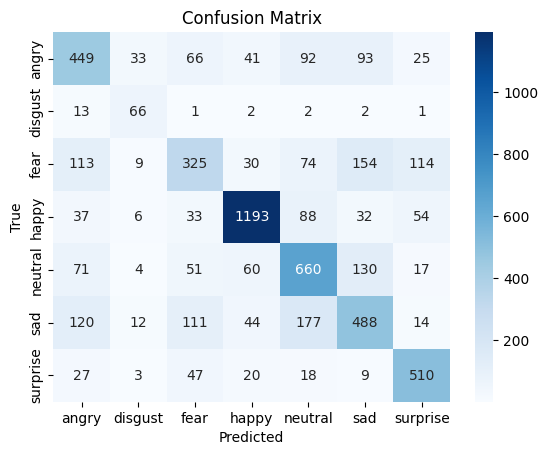

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIG ---
BATCH_SIZE = 64
IMG_SIZE = (48, 48)
EPOCHS = 70
NUM_CLASSES = 7
TRAIN_DIR = r'D:/AIML/fer2013/train'

# --- DATASET ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# --- CLASS WEIGHTS ---
y_labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- MODEL ---
def build_final_custom_model(input_shape=(48, 48, 3), num_classes=7):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.30))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.35))

    # Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(384, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_final_custom_model()

# --- COMPILE ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy')]
)

# --- CALLBACKS ---
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, min_lr=1e-5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model_final.h5", save_best_only=True, monitor='val_categorical_accuracy', mode='max')
]

# --- TRAIN ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# --- EVALUATE ---
loss, acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")

# --- CLASSIFICATION REPORT ---
val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
labels = list(val_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/70
359/359 [==============================] - 65s 170ms/step - loss: 2.3727 - categorical_accuracy: 0.1454 - val_loss: 2.0643 - val_categorical_accuracy: 0.1467 - lr: 0.0010
Epoch 2/70
359/359 [==============================] - 61s 170ms/step - loss: 2.0951 - categorical_accuracy: 0.1494 - val_loss: 1.9182 - val_categorical_accuracy: 0.2228 - lr: 9.9950e-04
Epoch 3/70
359/359 [==============================] - 61s 169ms/step - loss: 1.9678 - categorical_accuracy: 0.1757 - val_loss: 1.9635 - val_categorical_accuracy: 0.1036 - lr: 9.9801e-04
Epoch 4/70
359/359 [==============================] - 59s 164ms/step - loss: 1.8851 - categorical_accuracy: 0.2192 - val_loss: 1.9026 - val_categorical_accuracy: 0.2388 - lr: 9.9552e-04
Epoch 5/70
359/359 [==============================] - 61s 170ms/step - loss: 1.8213 - categorical_accuracy: 0.2540 - val_loss: 1.9486 - val_categorical_accuracy: 0.1932 - lr: 

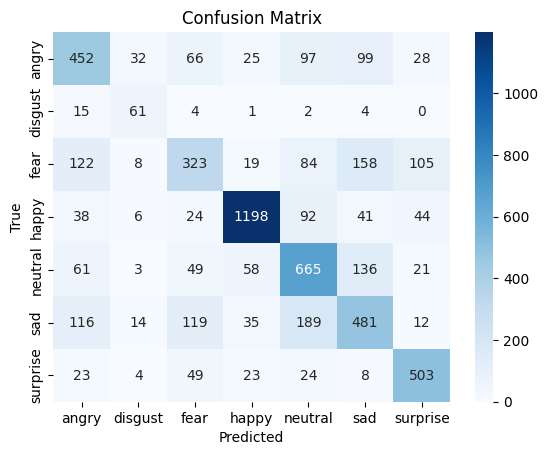

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIG ---
BATCH_SIZE = 64
IMG_SIZE = (48, 48)
EPOCHS = 70
NUM_CLASSES = 7
TRAIN_DIR = r'D:/AIML/fer2013/train'

# --- DATASET ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# --- CLASS WEIGHTS ---
y_labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- MODEL ---
def build_final_custom_model(input_shape=(48, 48, 3), num_classes=7):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.30))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.35))

    # Block 4 (new)
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.4))

    # Dense Layers
    model.add(layers.Dense(384, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_final_custom_model()

# --- COMPILE ---
initial_lr = 1e-3
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy')]
)

# --- CALLBACKS ---
cosine_lr = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 + 0.5 * (initial_lr - 1e-5) * (1 + np.cos(np.pi * epoch / EPOCHS))
)

callbacks = [
    cosine_lr,
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model_final.h5", save_best_only=True, monitor='val_categorical_accuracy', mode='max')
]

# --- TRAIN ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# --- EVALUATE ---
loss, acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")

# --- CLASSIFICATION REPORT ---
val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
labels = list(val_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [3]:
model.save("final_custom_model.keras")

In [2]:
import cv2 as cv
import numpy as np
import time
from tensorflow.keras.models import load_model

# --- Load the trained model ---
model = load_model("best_model_final.h5")

# --- Emotion labels ---
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Start Webcam
cap = cv.VideoCapture(0)

# Haar Cascade for face detection
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Starting Webcam.....press 'q' to quit.")

pTime = 0
overall_emotion = {label: 0 for label in emotion_labels}
frame_count = 0
inference_interval = 5

# To retain previous prediction
last_emotion = "Detecting..."
last_box = None

while True:
    ret, frame = cap.read()
    if not ret:
        print("Frame capture failed")
        break

    # Always calculate FPS
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime

    if frame_count % inference_interval == 0:
        # Convert to grayscale and equalize histogram
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        gray = cv.equalizeHist(gray)

        # Detect Face
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        if len(faces) > 0:
            (x, y, w, h) = faces[0]  # take only the first face
            face_img = frame[y:y+h, x:x+w]

            # Resize to model input size (48x48), normalize
            face_img_resized = cv.resize(face_img, (48, 48)).astype('float32') / 255.0
            face_img_resized = np.expand_dims(face_img_resized, axis=0)  # batch dimension
            face_img_resized = np.expand_dims(face_img_resized, axis=-1) if face_img_resized.shape[-1] == 1 else face_img_resized  # ensure (1, 48, 48, 3)

            # Predict using custom model
            preds = model.predict(face_img_resized, verbose=0)
            emotion = emotion_labels[np.argmax(preds)]

            # Save for next frames
            last_emotion = emotion
            last_box = (x, y, w, h)

            overall_emotion[emotion] += 1

    most_common_emotion = max(overall_emotion, key=overall_emotion.get)

    # Draw previous prediction if available
    if last_box is not None:
        x, y, w, h = last_box
        cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv.putText(frame, last_emotion, (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        cv.putText(frame, f'Overall: {most_common_emotion}', (x+100, y+h+20), cv.FONT_HERSHEY_PLAIN, 0.9, (36, 255, 12), 2)

    # Always show FPS
    cv.putText(frame, f'FPS: {int(fps)}', (10, 30), cv.FONT_HERSHEY_PLAIN, 1, (36, 255, 12), 2)

    frame_count += 1
    cv.imshow('RealTime Emotion Detection', frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


Starting Webcam.....press 'q' to quit.
